### Anish kumar Barik - 24MDT0170

### Theory DA - 1

### PMDS505L - Data Mining and Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("Heart Prediction Quantum Dataset.csv")
data.head()

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
0,68,1,105,191,107,8.362241,1
1,58,0,97,249,89,9.249002,0
2,44,0,93,190,82,7.942542,1
3,72,1,93,183,101,6.495155,1
4,37,0,145,166,103,7.653900,1


In [5]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [9]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Logistic regression Accuracy score:',accuracy_score(y_test, lr.predict(X_test)))

Logistic regression Accuracy score: 0.92


Decision tree accuracy score: 0.93


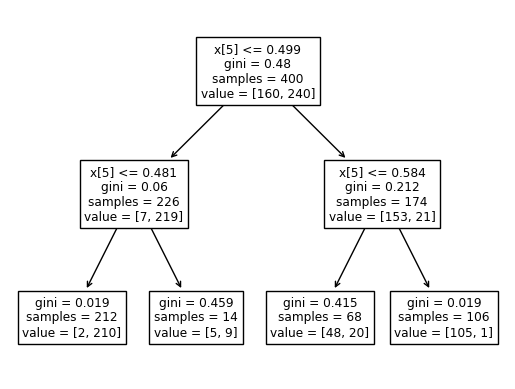

In [11]:
from sklearn.tree import plot_tree

dt_pred = DecisionTreeClassifier(random_state=42,max_depth=2)
dt_pred.fit(X_train,y_train)

plot_tree(dt_pred)

print('Decision tree accuracy score:',accuracy_score(y_test, dt_pred.predict(X_test)))

In [13]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
print('random_forest accuracy score:',accuracy_score(y_test,rfc.predict(X_test)))

random_forest accuracy score: 0.93


In [17]:
abc = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=30,random_state=42)
abc.fit(X_train,y_train)
print('Ada_boost accuracy score:',accuracy_score(y_test,abc.predict(X_test)))

Ada_boost accuracy score: 0.93


In [19]:
gbc = GradientBoostingClassifier(n_estimators=30, random_state=42)
gbc.fit(X_train,y_train)
print('gradient_bost accuracy score:',accuracy_score(y_test, gbc.predict(X_test)))

gradient_bost accuracy score: 0.93


In [21]:
svc = SVC(random_state=42)
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
print('support vector accurcy score:',accuracy_score(y_test, svc_pred))

support vector accurcy score: 0.94


In [23]:
bg = BaggingClassifier(estimator=LogisticRegression(), n_estimators=100)
bg.fit(X_train,y_train)
print('Bagging accuracy score:',accuracy_score(y_test, bg.predict(X_test)))

Bagging accuracy score: 0.92


In [25]:
param_grid = {
    'n_estimators' : [10,20],
    'learning_rate' : [0.1,0.2]
}

gsv = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=param_grid,cv=5,scoring="accuracy")
gsv.fit(X_train,y_train)

print(gsv.best_params_)
print(gsv.best_score_)
new_model = gsv.best_estimator_

{'learning_rate': 0.2, 'n_estimators': 10}
0.9200000000000002


In [33]:
new_model.fit(X_train,y_train)
print('Hyperparameter_tuning_accuracy score  with Gradient Boosting:',accuracy_score(y_test,new_model.predict(X_test)))

Hyperparameter_tuning_accuracy score  with Gradient Boosting: 0.94


In [35]:
param_grid = {
    'max_iter' : [100,200],
    'C' : [1,2]
}

gsv = GridSearchCV(estimator=LogisticRegression(),param_grid=param_grid,cv=5,scoring="accuracy")
gsv.fit(X_train,y_train)

print(gsv.best_params_)
print('Logistic regrrssion with hyperparam_tuning:',gsv.best_score_)

{'C': 2, 'max_iter': 100}
Logistic regrrssion with hyperparam_tuning: 0.8800000000000001


In [37]:
param_grid = {
    'kernel' : ['rbf','sigmoid'],
    'C' : [1,2,3]
}

gsv = GridSearchCV(estimator=SVC(),param_grid=param_grid,cv=5,scoring="accuracy")
gsv.fit(X_train,y_train)

print(gsv.best_params_)
print('Support Vector with Hyperparameter_tuning:',gsv.best_score_)

{'C': 1, 'kernel': 'rbf'}
Support Vector with Hyperparameter_tuning: 0.8699999999999999


In [39]:
param_grid = {
    'n_estimators' : [100,200],
    'max_depth' : [4,5,6]
}

gsv = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,cv=5,scoring="accuracy")
gsv.fit(X_train,y_train)

print(gsv.best_params_)
print('RandomForestClassifier with Hyperparameter_tuning:',gsv.best_score_)

{'max_depth': 4, 'n_estimators': 200}
RandomForestClassifier with Hyperparameter_tuning: 0.9174999999999999


In [41]:
param_grid = {
    'estimator__max_depth' : [1,2,3],
    'n_estimators' : [40,50],
    'learning_rate' :[0.1,0.01,0.2]
}

gsv = GridSearchCV(estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier()),param_grid=param_grid,cv=5,scoring="accuracy")
gsv.fit(X_train,y_train)

print(gsv.best_params_)
print('AdaBoostClassifier with hyperparam_tuning:',gsv.best_score_)

{'estimator__max_depth': 2, 'learning_rate': 0.01, 'n_estimators': 50}
AdaBoostClassifier with hyperparam_tuning: 0.925


In [43]:
param_grid = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [5,8,9]
}

gsv = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_grid,cv=5,scoring="accuracy")
gsv.fit(X_train,y_train)

print(gsv.best_params_)
print('DecisionTreeClassifier with hyperparam_tuning:',gsv.best_score_)

{'criterion': 'gini', 'max_depth': 5}
DecisionTreeClassifier with hyperparam_tuning: 0.9025000000000001


In [45]:
param_grid = {
    'n_estimators' : [40,50],
    'bootstrap':[True,False]
}

gsv = GridSearchCV(estimator=BaggingClassifier(estimator=LogisticRegression()),param_grid=param_grid,cv=5,scoring="accuracy")
gsv.fit(X_train,y_train)

print(gsv.best_params_)
print('BaggingClassifier with hyperparam_tuning:',gsv.best_score_)

{'bootstrap': False, 'n_estimators': 40}
BaggingClassifier with hyperparam_tuning: 0.875


In [47]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [49]:
pca = PCA(n_components=2)

In [51]:
new_data = pca.fit_transform(data)
new_data

array([[-2.94153817e+01, -3.00445853e+01],
       [ 2.87633188e+01, -3.46661379e+01],
       [-3.00437118e+01, -4.05530362e+01],
       [-3.70664170e+01, -4.17205697e+01],
       [-5.57002293e+01,  8.50530433e+00],
       [ 5.00556619e+01, -1.58291909e+01],
       [ 2.47025750e+00,  2.47166896e+01],
       [ 1.35045274e+01,  2.56474124e+01],
       [ 4.52849242e+01, -1.72772903e+01],
       [ 3.40528230e+01, -1.15138745e+01],
       [ 1.31757838e+01,  8.25883052e+00],
       [-4.59978732e+01,  1.46974332e+01],
       [-1.56971724e+01,  5.52659103e+00],
       [-4.05895322e+01, -2.68775862e+01],
       [ 6.24750825e+01, -2.25311845e+01],
       [ 2.72358229e+01, -4.07267966e+01],
       [-6.16747944e+01,  3.42887420e+01],
       [-1.94171761e+01, -1.84366865e+00],
       [ 6.50587231e+01,  1.72880951e+01],
       [ 7.32090678e+01, -1.94788037e+01],
       [ 5.02285211e+01, -2.04998141e+01],
       [-2.75529305e+01,  2.61111133e+01],
       [-7.04745251e+00, -4.13049223e+01],
       [ 5.

In [53]:
X_train,X_test,y_train,y_test = train_test_split(new_data, y, train_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train,y_train)
print(accuracy_score(y_test,lr.predict(X_test)))


gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
print(accuracy_score(y_test,gb.predict(X_test)))


abc = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=30,random_state=42)
abc.fit(X_train,y_train)
print(accuracy_score(y_test,abc.predict(X_test)))

svc = SVC(random_state=42)
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
print(accuracy_score(y_test, svc_pred))

bg = BaggingClassifier(estimator=LogisticRegression(), n_estimators=100)
bg.fit(X_train,y_train)
print(accuracy_score(y_test, bg.predict(X_test)))

0.67
0.6
0.6325
0.65
0.665


Text(0, 0.5, 'Feature 2')

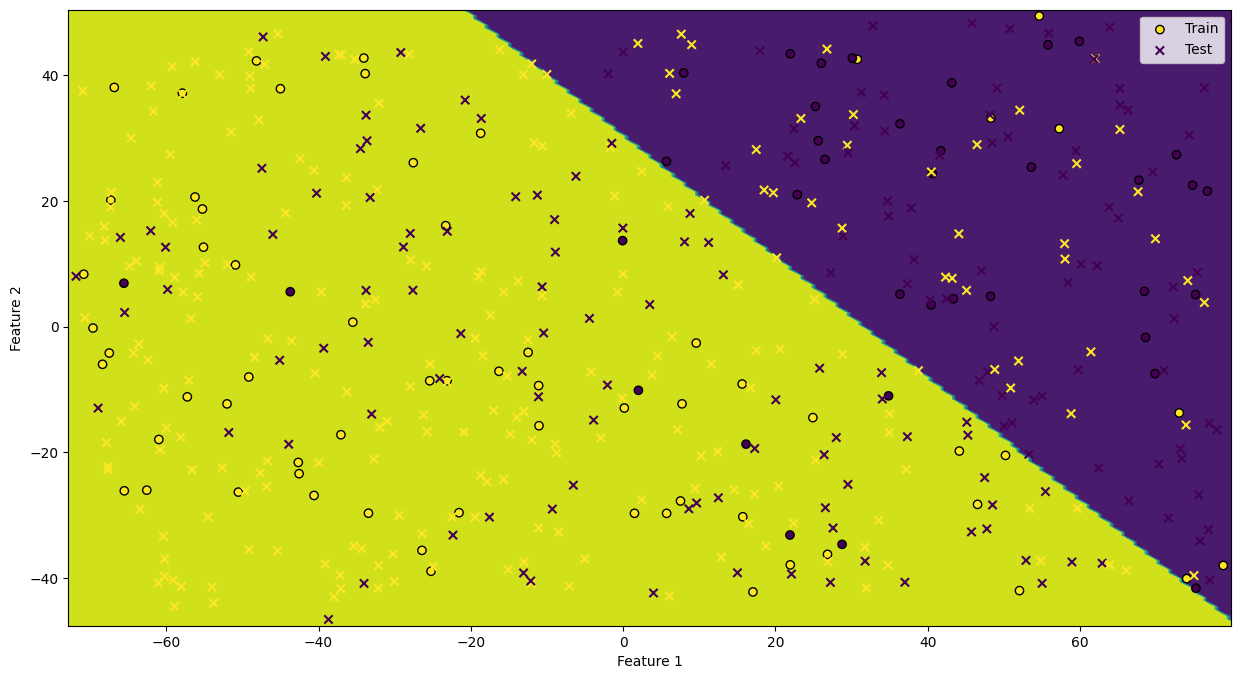

In [55]:
plt.figure(figsize=(15,8))

x_min, x_max =  new_data[:,0].min() - 1, new_data[:,0].max() + 1
y_min, y_max = new_data[:,1].min() - 1, new_data[:,1].max() + 1

xx,yy = np.meshgrid(np.linspace(x_min,x_max,200), np.linspace(y_min,y_max,200))
Z = lr.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx,yy,Z)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train, edgecolors="k",label="Train")
plt.scatter(X_test[:,0],X_test[:,1],c=y_test, marker="x", label="Test")
plt.legend()

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

Text(0, 0.5, 'Feature 2')

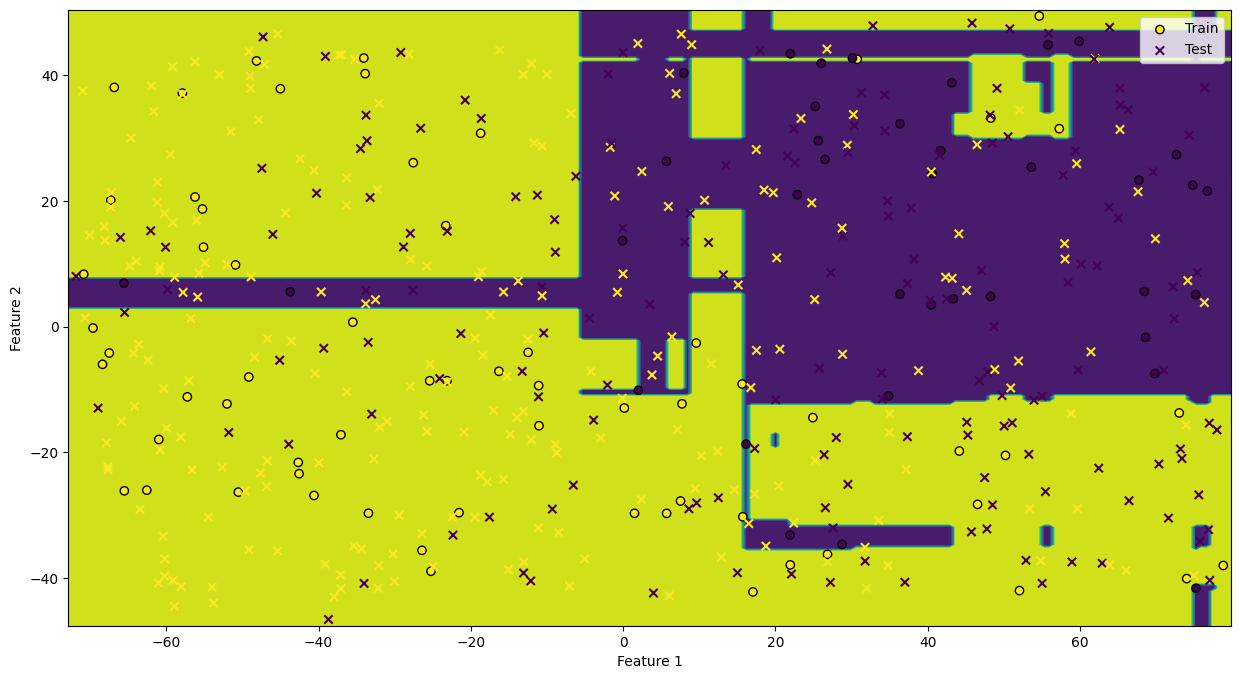

In [57]:
plt.figure(figsize=(15,8))

x_min, x_max =  new_data[:,0].min() - 1, new_data[:,0].max() + 1
y_min, y_max = new_data[:,1].min() - 1, new_data[:,1].max() + 1

xx,yy = np.meshgrid(np.linspace(x_min,x_max,200), np.linspace(y_min,y_max,200))
Z = gb.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx,yy,Z)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train, edgecolors="k",label="Train")
plt.scatter(X_test[:,0],X_test[:,1],c=y_test, marker="x", label="Test")
plt.legend()

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

Text(0, 0.5, 'Feature 2')

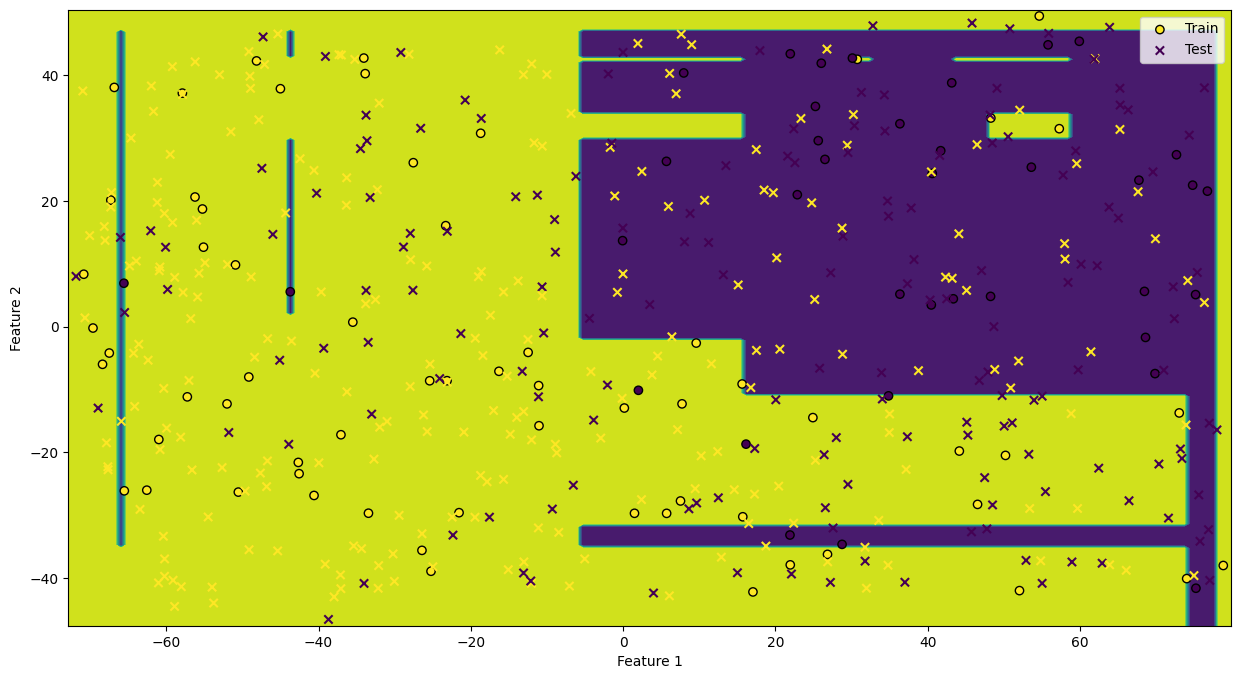

In [59]:
plt.figure(figsize=(15,8))

x_min, x_max =  new_data[:,0].min() - 1, new_data[:,0].max() + 1
y_min, y_max = new_data[:,1].min() - 1, new_data[:,1].max() + 1

xx,yy = np.meshgrid(np.linspace(x_min,x_max,200), np.linspace(y_min,y_max,200))
Z = abc.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx,yy,Z)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train, edgecolors="k",label="Train")
plt.scatter(X_test[:,0],X_test[:,1],c=y_test, marker="x", label="Test")
plt.legend()

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

Text(0, 0.5, 'Feature 2')

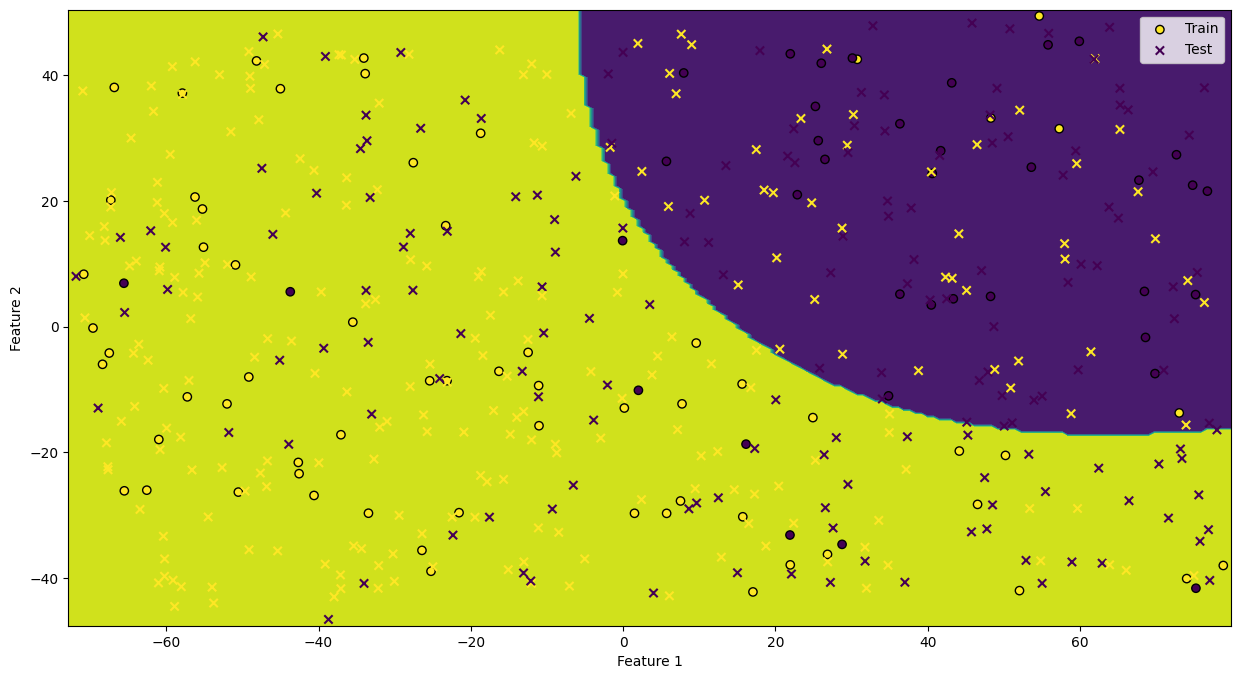

In [61]:
plt.figure(figsize=(15,8))

x_min, x_max =  new_data[:,0].min() - 1, new_data[:,0].max() + 1
y_min, y_max = new_data[:,1].min() - 1, new_data[:,1].max() + 1

xx,yy = np.meshgrid(np.linspace(x_min,x_max,200), np.linspace(y_min,y_max,200))
Z = svc.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx,yy,Z)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train, edgecolors="k",label="Train")
plt.scatter(X_test[:,0],X_test[:,1],c=y_test, marker="x", label="Test")
plt.legend()

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")